#  MSCA 37011 - Deep Learning and Image Recognition

## Session 3a - Activation Functions

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#input array
x = np.arange(-6,6,0.01)
print(x)

[-6.   -5.99 -5.98 ...,  5.97  5.98  5.99]


## Step

$$  f(x) =
\begin{cases}
0,  & \text{if $x$ < 0.5} \\
1, & \text{if $x$ >= 0.5}
\end{cases}$$

In [5]:
def step(x, t):
    return 1 * (x > t)

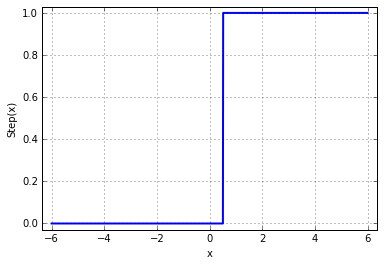

In [6]:
plt.plot(x, step(x, 0.5), linewidth= 2)
plt.xlabel('x')
plt.ylabel('Step(x)')
plt.margins(0.03)
plt.grid(1)

## Sigmoid

Sigmoid activation, also used in logistic regression regression, squashes the input space from (-inf,inf) to (0,1)

$$f(x) = \frac{1}{1+ e^{-x}}$$

In [7]:
def sigmoid(x):
    #sigmoid activation function
    return 1/(1+np.exp(-x))

### Sigmoid Derivative

$$f'(x) = \frac{e^{-x}}{(1+ e^{-x})^2} = f(x)(1-f(x))$$
$$\frac{dy}{dz} = y(1-y)$$

In [8]:
def sigmoidPrime(x):
    #Derivative of sigmoid function
    return np.exp(-x)/((1+np.exp(-x))**2)

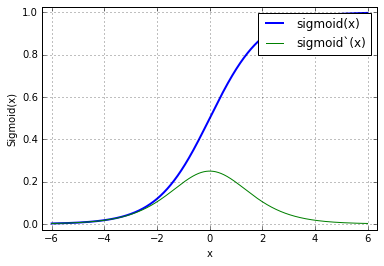

In [9]:
plt.plot(x, sigmoid(x), linewidth= 2, label='sigmoid(x)')
plt.plot(x, sigmoidPrime(x), linewidth= 1, label='sigmoid`(x)')
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.margins(0.03)
plt.legend()
plt.grid(1)

## Tanh - hyperbolic tangent

The tanh(z) function is a rescaled version of the sigmoid, and its output range is [−1,1] instead of [0,1].

$$f(x) = \frac{e^{x}- e^{-x}}{e^{x}+ e^{-x}}$$

In [10]:
def tanh(x):
    return ((np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x)))

### Tanh Derivative

$$f'(x) = 1-f(x)^2$$

In [11]:
def tanhPrime(x):
    #Derivative of tanh function
    return (1- tanh(x)**2)

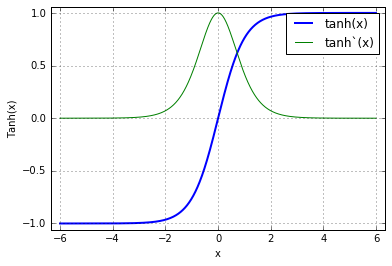

In [12]:
plt.plot(x, tanh(x), linewidth= 2, label='tanh(x)')
plt.plot(x, tanhPrime(x), linewidth= 1, label='tanh`(x)')
plt.xlabel('x')
plt.ylabel('Tanh(x)')
plt.legend()
plt.margins(0.03)
plt.grid(1)

## Rectifier (ReLU)

Recent research has found a different activation function, the rectified linear function, often works better in practice for deep neural networks. This activation function is different from sigmoid and tanh because it is not bounded or continuously differentiable. The rectified linear function is piece-wise linear and saturates at exactly 0 whenever the input z is less than 0.

*Dont be negative :-)* 

$$f(x) = max(0,x)$$ 

In [10]:
def ReLU(z):
    return np.maximum(0,z)

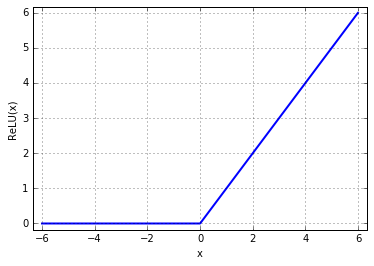

In [11]:
plt.plot(x, ReLU(x), linewidth= 2)
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.margins(0.03)
plt.grid(1)

## Softplus

$$f(x) = log(1 + e^x)$$

In [12]:
def softplus(x):
    return np.log(1 + np.exp(x))

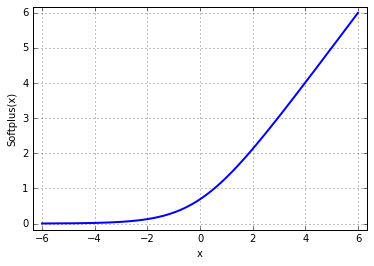

In [13]:
plt.plot(x, softplus(x), linewidth= 2)
plt.xlabel('x')
plt.ylabel('Softplus(x)')
plt.margins(0.03)
plt.grid(1)

## Activation Functions Comparison

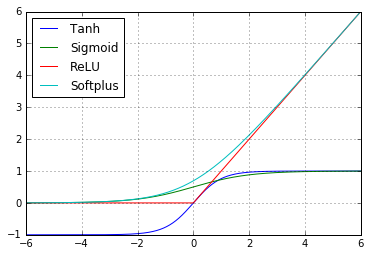

In [14]:
fig, ax = plt.subplots()
ax.plot(x, tanh(x),  label='Tanh')
ax.plot(x, sigmoid(x),  label='Sigmoid')
ax.plot(x, ReLU(x), label='ReLU')
ax.plot(x, softplus(x), label='Softplus')
ax.legend(loc='upper left')
ax.grid(1)

## Sigmoid - Matrix Input 

You can also pass a multi-dimensional matrix to the activation function. This is an example of a 2D matrix.

[[-12 -11 -10  -9  -8]
 [ -7  -6  -5  -4  -3]
 [ -2  -1   0   1   2]
 [  3   4   5   6   7]
 [  8   9  10  11  12]]


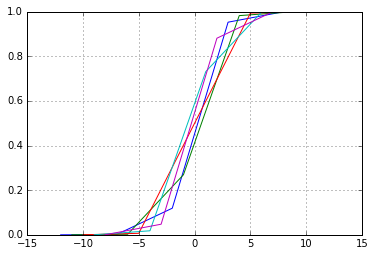

In [15]:
xm = np.arange(-12,13,1).reshape((5, 5))
print (xm) 
#pass a matrix into the sigmoid
plt.plot(xm, sigmoid(xm), linewidth= 1)
plt.grid(1)

## Softmax (Normalized Exponential)

$$\mathrm{softmax}(\mathbf{x})_i = \frac{e^{\mathbf{x}_i}}{\sum_{j=1}^n e^{\mathbf{x}_j}}$$



Softmax is a generalization of the logistic function and is used in various probabilistic multiclass classification methods including multinomial logistic regression,multiclass linear discriminant analysis, naive Bayes classifiers and artificial neural networks. In Neural Networks softmax function is often implemented at the final layer of a network used for classification. 

In [16]:
x = np.arange(-6,6,0.01)

In [17]:
def softmax(w):
    return np.exp(w)/ np.sum(np.exp(w), axis=0)

Scores : [[-6.   -5.99 -5.98 ...,  5.97  5.98  5.99]
 [ 1.    1.    1.   ...,  1.    1.    1.  ]
 [ 0.2   0.2   0.2  ...,  0.2   0.2   0.2 ]]
Probabilities : [  6.17507402e-08   6.23713454e-08   6.29981879e-08 ...,   9.75319968e-03
   9.85122097e-03   9.95022739e-03]


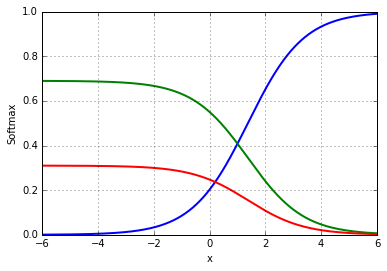

In [18]:
#create 3 sets of scores
scores = np.vstack([x, np.ones_like(x), 0.2*np.ones_like(x)])
print ("Scores :", scores)
print ("Probabilities :", softmax(x))
plt.plot(x, softmax(scores).T, linewidth= 2)
plt.xlabel('x')
plt.ylabel('Softmax')
plt.legend()
plt.grid(1)